## Inteligência Artificial 2025.1 : Atividade N1 - 2o Bimestre 

### Nome:

### RA:

Um engenheiro de computação foi contratado para trabalhar com **deep learning** em uma startup. Como em todos os segmentos de mercado que utilizam essa tecnologia, os dados analisados são confidenciais e não podem ser expostos ou vazados. Diante disso, o engenheiro trabalhará com a base de dados **"Base_N1_B2_2025.1.xlsx"**, sem o conhecimento do tipo de negócio que os dados foram extraídos. 

A partir dos dados fornecidos, o engenheiro de computação deve desenvolver:

**(5,0 pontos) um classificador utilizando Redes Neurais Artificiais que retorne a classe "Red" ou "Blue" para uma entrada [Feature1, Feature2];**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
base = pd.read_excel('Base_N1_B2_2025.1.xlsx')

base.head(10)

,Feature1,Feature2,Label
0,0.000000,0.000000,Blue
1,0.000125,0.002497,Blue
2,0.000499,0.004975,Blue
3,0.001121,0.007416,Blue
4,0.001987,0.009801,Blue
5,0.003093,0.012111,Blue
6,0.004433,0.014330,Blue
7,0.006001,0.016439,Blue
8,0.007788,0.018421,Blue
9,0.009787,0.020260,Blue


In [3]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Feature1  440 non-null    float64
 1   Feature2  440 non-null    float64
 2   Label     440 non-null    object 
dtypes: float64(2), object(1)
memory usage: 10.4+ KB


In [4]:
base['Label'].value_counts() / len(base)

Label
Blue    0.5
Red     0.5
Name: count, dtype: float64

In [5]:
stats = base.describe().round(3).T
stats

,count,mean,std,min,25%,50%,75%,max
Feature1,440.0,0.0,0.225,-0.547,-0.137,0.0,0.137,0.547
Feature2,440.0,-0.0,0.223,-0.474,-0.147,0.0,0.147,0.474


In [6]:
# Transformando o 'Label'
map_colors = {'Blue': 1, 'Red': 0}
base['Label'] = base['Label'].map(map_colors)

In [7]:
def plot_chart(dataset):
    blue_labels = dataset[dataset['Label'] == 1]
    red_labels = dataset[dataset['Label'] == 0]

    # Plot Feature 1 vs Feature 2
    plt.figure(figsize=(10, 6))
    # Plot Feature 1 as blue and Feature 2 as red
    plt.scatter(blue_labels['Feature1'], blue_labels['Feature2'], color='blue', label='Blue', alpha=0.5)
    plt.scatter(red_labels['Feature1'], red_labels['Feature2'], color='red', label='Red', alpha=0.5)
    plt.legend()

    plt.title('Feature 1 vs Feature 2')
    plt.xlabel('Feature1')
    plt.ylabel('Feature2')
    plt.grid()
    #plt.savefig('feature1_vs_feature2.png')
    plt.show()

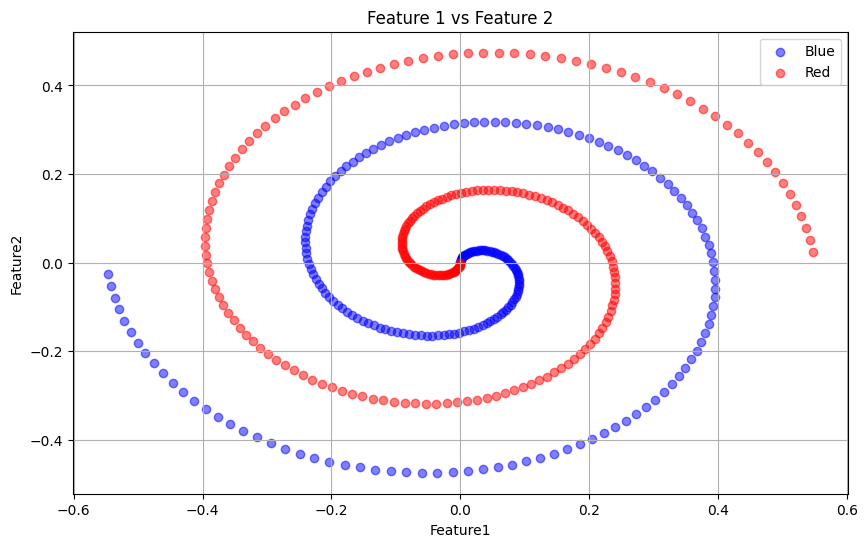

In [8]:
plot_chart(base)

In [9]:
# Separar features e labels
X = base[['Feature1', 'Feature2']].values
y = base['Label'].values

In [10]:
# Dividir em treino e teste
X_train_raw, X_test_raw, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Criar validação
X_train_raw, X_val_raw, y_train, y_val = train_test_split(
    X_train_raw, y_train, test_size=0.5, random_state=42
)

# Treino = 70%
# Validação = 15%
# Teste = 15%

In [11]:
pd.concat([pd.DataFrame(X_train_raw, columns=['Feature1', 'Feature2']), pd.Series(y_train, name='Label')], axis=1)

,Feature1,Feature2,Label
0,-0.040834,0.304777,1
1,-0.179575,-0.455909,1
2,0.052484,0.023488,1
3,-0.062544,0.116810,0
4,-0.071972,-0.008736,0
...,...,...,...
149,0.013948,-0.151861,1
150,-0.228549,-0.025795,1
151,-0.546932,-0.024943,1
152,0.529706,0.104938,0


In [13]:
# Feature engineering + MinMaxScaler
def feature_engineering(X_data, scaler=None, fit=False):
    df = pd.DataFrame(X_data, columns=['Feature1', 'Feature2'])
    df['quadrado_Feature1'] = df['Feature1'] ** 2
    df['quadrado_Feature2'] = df['Feature2'] ** 2
    if fit:
        scaler.fit(df)
    return scaler.transform(df)

In [15]:
scaler = MinMaxScaler()
X_train = feature_engineering(X_train_raw, scaler, fit=True)
X_val = feature_engineering(X_val_raw, scaler)
X_test = feature_engineering(X_test_raw, scaler)

In [ ]:
# Construção da rede neural
model = Sequential([
    Dense(10, input_shape=(4,), activation='relu'), # 1ª camada oculta
    Dense(10, activation='relu'), # 2ª camada oculta
    Dense(10, activation='relu'), # 3ª camada oculta
    Dense(1, activation='sigmoid') # camada de saída
])

/Users/iscoutto/Documents/projects/ai-ml-algorithms/cefsa/redes-neurais/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
# Compilar o modelo
model.compile(optimizer=Adam(learning_rate=0.03), loss='binary_crossentropy', metrics=['accuracy'])


In [18]:
early_stopping = EarlyStopping(monitor='val_loss', patience=100, restore_best_weights=True)


In [19]:
# Treinar o modelo
history = model.fit(X_train, y_train, epochs=1000, batch_size=32,
                    validation_data=(X_val, y_val), callbacks=[early_stopping])

Epoch 1/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.4497 - loss: 0.7061 - val_accuracy: 0.4156 - val_loss: 0.7007
Epoch 2/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5290 - loss: 0.6770 - val_accuracy: 0.4156 - val_loss: 0.7097
Epoch 3/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5638 - loss: 0.6518 - val_accuracy: 0.4156 - val_loss: 0.6850
Epoch 4/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5546 - loss: 0.6251 - val_accuracy: 0.4156 - val_loss: 0.6470
Epoch 5/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5781 - loss: 0.6112 - val_accuracy: 0.5714 - val_loss: 0.6351
Epoch 6/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7329 - loss: 0.6000 - val_accuracy: 0.5649 - val_loss: 0.6314
Epoch 7/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6722 - loss: 0.5791 - val_accuracy: 0.5909 - val_loss: 0.6289
Epoch 8/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7181 - loss: 0.5862 - val_accuracy: 0.6558 - val_loss

In [20]:
# Avaliar o modelo
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Acurácia no teste: {accuracy:.2%}")

Acurácia no teste: 99.24%


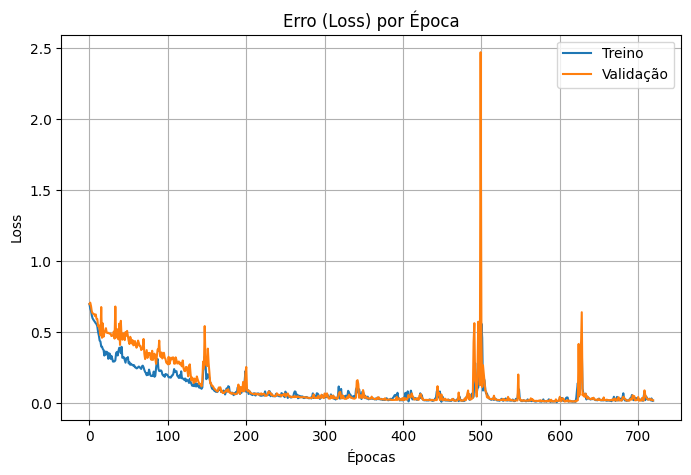

In [21]:
# Plot do erro (loss)
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Treino')
plt.plot(history.history['val_loss'], label='Validação')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.title('Erro (Loss) por Época')
plt.legend()
plt.grid(True)
plt.show()

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


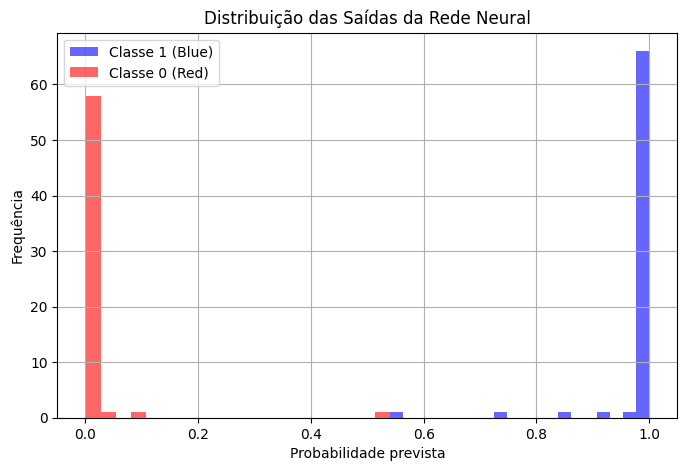

In [22]:
# Plot da saída do modelo
y_pred_prob = model.predict(X_test).flatten()
plt.figure(figsize=(8, 5))
plt.hist(y_pred_prob[y_test == 1], bins=20, alpha=0.6, label='Classe 1 (Blue)', color='blue')
plt.hist(y_pred_prob[y_test == 0], bins=20, alpha=0.6, label='Classe 0 (Red)', color='red')
plt.xlabel('Probabilidade prevista')
plt.ylabel('Frequência')
plt.title('Distribuição das Saídas da Rede Neural')
plt.legend()
plt.grid(True)
plt.show()

In [24]:
def plot_decision_boundary(model, scaler, X_data, y_data, title='Fronteira de Decisão da Rede Neural'):
    margin = 0.1
    x_min, x_max = X_data[:, 0].min() - margin, X_data[:, 0].max() + margin
    y_min, y_max = X_data[:, 1].min() - margin, X_data[:, 1].max() + margin
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    
    grid = np.c_[xx.ravel(), yy.ravel()]
    df_grid = pd.DataFrame(grid, columns=['Feature1', 'Feature2'])
    df_grid['quadrado_Feature1'] = df_grid['Feature1'] ** 2
    df_grid['quadrado_Feature2'] = df_grid['Feature2'] ** 2
    grid_scaled = scaler.transform(df_grid)

    Z = model.predict(grid_scaled)
    Z = (Z > 0.5).astype(int).reshape(xx.shape)

    # Início do plot com estilo igual ao seu
    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, levels=[0, 0.5, 1], colors=['red', 'blue'], alpha=0.3)

    # Separação das classes
    red_labels = X_data[y_data == 0]
    blue_labels = X_data[y_data == 1]

    plt.scatter(blue_labels[:, 0], blue_labels[:, 1], color='blue', label='Blue', alpha=0.5, edgecolors='none')
    plt.scatter(red_labels[:, 0], red_labels[:, 1], color='red', label='Red', alpha=0.5, edgecolors='none')

    plt.legend()
    plt.title(title)
    plt.xlabel('Feature1')
    plt.ylabel('Feature2')
    plt.grid()
    plt.show()

464/464 ━━━━━━━━━━━━━━━━━━━━ 0s 231us/step


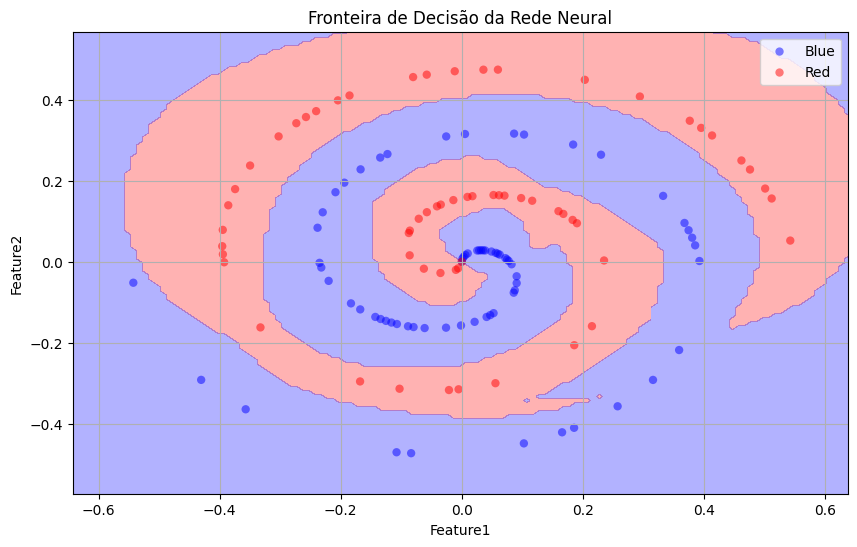

In [25]:
plot_decision_boundary(model, scaler, X_test_raw, y_test)

**(2,0 pontos) o diagrama da rede neural desenvolvida no item anterior e indicar a quantidade de parâmetros dessa rede;**

In [26]:
# Resumo da arquitetura com quantidade de parâmetros
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │            50 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 845 (3.30 KB)

 Trainable params: 281 (1.10 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 564 (2.21 KB)

In [27]:
total_params = model.count_params()
print(f"Total de parâmetros treináveis: {total_params}")

Total de parâmetros treináveis: 281


**(2,0 pontos) um parágrafo explicando a precisão da rede neural desenvolvida e os pontos de atenção que devem ser observados na utilização desta rede com novos dados;**

A acurácia obtida pela rede neural no conjunto de teste foi de aproximadamente **99.24%**, valor que, embora satisfatório sob uma análise superficial, requer uma avaliação crítica mais aprofundada. A discrepância potencial entre o desempenho nos dados de treino, validação e teste pode sugerir **indícios de sobreajuste (overfitting)**, principalmente considerando a profundidade da rede e o tamanho do conjunto de dados. Ainda que a rede tenha sido validada com uma partição de 15%, é possível que a sua capacidade de generalização esteja comprometida caso os dados futuros apresentem **distribuição distinta da amostragem original**. Além disso, como a base de dados se refere a um problema de classificação binária com características visivelmente não lineares, a escolha da arquitetura com três camadas ocultas de 10 neurônios cada deve ser justificada não apenas pela acurácia, mas também pela **análise da complexidade do modelo frente à variabilidade dos dados**. Outro ponto crítico é o risco de **viés induzido por desequilíbrio de classes ou características irrelevantes**, ainda que suavizado por técnicas de normalização e engenharia de atributos (feature engineering), tais fatores devem ser monitorados ao aplicar o modelo em contextos distintos. Em resumo, a precisão observada não pode ser interpretada isoladamente como indicativo de desempenho robusto, sendo imprescindível complementar a análise com métricas adicionais (como AUC, F1-score), análise residual e testes em conjuntos externos para assegurar **capacidade real de generalização**.


**(1,0 ponto) uma API para classificação de novos dados sem utilizar qualquer biblioteca ou método ("prediction") obtido no treinamento da rede neural.**

In [44]:
# Ativações
def relu(x):
    return np.maximum(0, x)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [45]:
weights = model.get_weights()
for w in weights:
    print(w.shape)  # Para conferência

(4, 10)
(10,)
(10, 10)
(10,)
(10, 10)
(10,)
(10, 1)
(1,)


In [46]:
class NeuralNetworkClassifier:
    def __init__(self):
        # Pesos e biases definidos estaticamente conforme dimensões fornecidas
        # Substitua pelos valores reais extraídos via model.get_weights()
        self.W1 = np.random.rand(4, 10)
        self.b1 = np.random.rand(10,)
        self.W2 = np.random.rand(10, 10)
        self.b2 = np.random.rand(10,)
        self.W3 = np.random.rand(10, 10)
        self.b3 = np.random.rand(10,)
        self.W4 = np.random.rand(10, 1)
        self.b4 = np.random.rand(1,)

        # Parâmetros do MinMaxScaler (obtidos após .fit(df_scaled))
        # Substitua pelos valores reais do scaler
        self.min_ = np.array([0.0, 0.0, 0.0, 0.0])       # min por feature
        self.scale_ = np.array([1.0, 1.0, 1.0, 1.0])     # (1 / (max - min)) por feature

    def preprocess(self, input_vector):
        f1, f2 = input_vector
        f1_sq = f1 ** 2
        f2_sq = f2 ** 2
        x = np.array([[f1, f2, f1_sq, f2_sq]])

        # MinMax scaling manual
        x_scaled = (x - self.min_) * self.scale_
        return x_scaled

    def forward(self, x):
        z1 = relu(np.dot(x, self.W1) + self.b1)
        z2 = relu(np.dot(z1, self.W2) + self.b2)
        z3 = relu(np.dot(z2, self.W3) + self.b3)
        output = sigmoid(np.dot(z3, self.W4) + self.b4)
        return output[0][0]

    def predict(self, input_vector):
        x = self.preprocess(input_vector)
        prob = self.forward(x)
        classe = 'Blue' if prob >= 0.5 else 'Red'
        return {
            'entrada': input_vector,
            'probabilidade_blue': prob,
            'classe_prevista': classe
        }

In [47]:
# Testando a API
modelo = NeuralNetworkClassifier()
entrada = [0.75, 0.3]
saida = modelo.predict(entrada)
print(saida)

{'entrada': [0.75, 0.3], 'probabilidade_blue': np.float64(1.0), 'classe_prevista': 'Blue'}


#### Lembre-se: na dúvida, você é o engenheiro do projeto!